In [34]:
import scipy.stats as stats
from scipy.stats import wilcoxon, kruskal
import scikit_posthocs as sp
import pandas as pd
import xlrd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scikit_posthocs import posthoc_dunn
import numpy as np

In [4]:
test_results = pd.read_excel("C:\\Users\\MERVE EKİZ\\Downloads\\wandb_test_results_for_each_test_queries.xlsx")

In [6]:
test_results.head()

,model,question,context_recall,non_llm_context_precision_with_reference,factual_correctness,faithfulness,semantic_similarity
0,model1,question1,0.00,0.333333,0.13,0.181818,0.877565
1,model1,question2,0.00,0.000000,0.00,0.714286,0.909921
2,model1,question3,0.00,0.000000,0.00,0.111111,0.837286
3,model1,question4,0.75,0.250000,0.38,0.290323,0.925462
4,model1,question5,1.00,0.000000,0.24,0.750000,0.906159


In [23]:
# define metrics 
all_metrics = [
    "context_recall",
    "non_llm_context_precision_with_reference",
    "factual_correctness",
    "faithfulness",
    "semantic_similarity",
]

In [10]:
# group data for each model
grouped_data = test_results.groupby("model")

### Kruskal-Wallis Test

In [ ]:
kruskal_results = {}
for metric in all_metrics:
    data_per_model = [group[metric].dropna().values for name, group in grouped_data]
    kruskal_results[metric] = kruskal(*data_per_model)

In [25]:
kruskal_results

{'context_recall': KruskalResult(statistic=np.float64(65.5118530614089), pvalue=np.float64(1.1470359491165629e-10)),
 'non_llm_context_precision_with_reference': KruskalResult(statistic=np.float64(45.77780441551039), pvalue=np.float64(6.621809934620748e-07)),
 'factual_correctness': KruskalResult(statistic=np.float64(28.88212203047654), pvalue=np.float64(0.0006783813125094425)),
 'faithfulness': KruskalResult(statistic=np.float64(25.678331228695193), pvalue=np.float64(0.0023056774069366444)),
 'semantic_similarity': KruskalResult(statistic=np.float64(28.120905199654707), pvalue=np.float64(0.0009104878396912417))}

Kruskal - Wallis Test Results:
As it is seen from the code above, all metrics have a significant difference among models because the p-value is less than 0.05 for each metric. 

1. Semantic Similarity: 
𝑝=0.00091
Significant differences exist among models.
2. Factual Correctness: 
𝑝=0.00068
Significant differences exist among models.
3. Context Recall:  
𝑝<0.0001
Significant differences exist among models.
4. Non-LLM Context Precision with Reference:
p<0.0001
Significant differences exist among models.
5. Faithfulness:
p=0.0023 
Significant differences exist among models.


#### Dunn's Test to compare all pairwise differences between groups

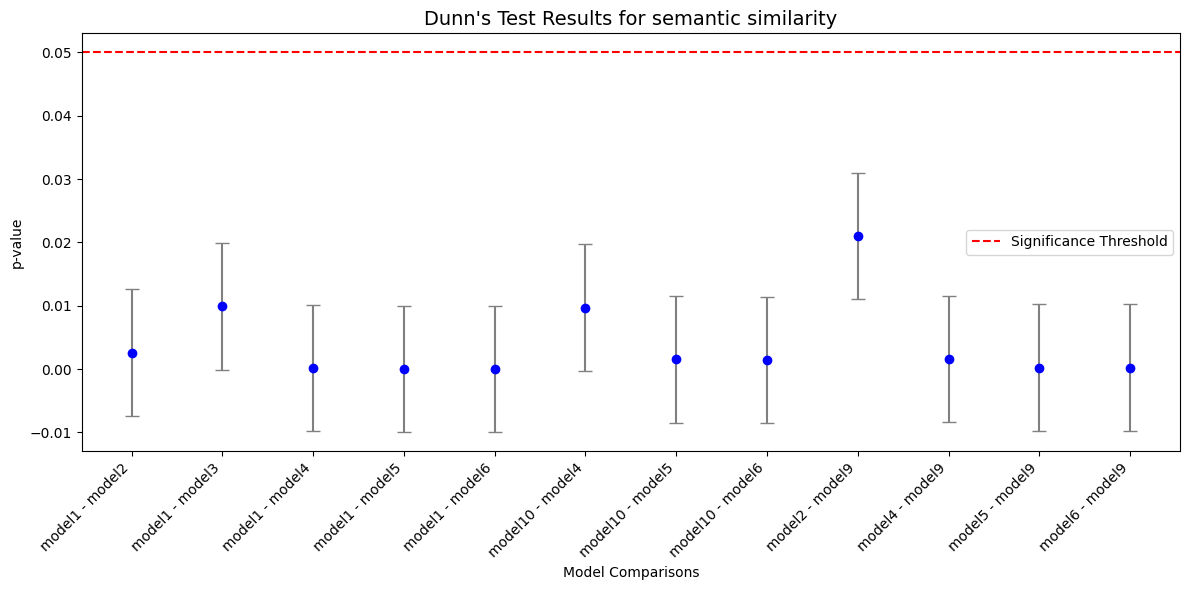

In [62]:
# Perform Dunn's test
dunn_results = posthoc_dunn(
    test_results, val_col="semantic_similarity", group_col="model", p_adjust="bonferroni"
)

# Extract significant comparisons
significant_pairs1 = [
    (row, col, p_value)
    for row, series in dunn_results.iterrows()
    for col, p_value in series.items()
    if row < col and p_value < 0.05
]

# Prepare visualization data
x_labels = []
x_values = []
y_errors = []

for i, (model1, model2, p_value) in enumerate(significant_pairs1):
    x_labels.append(f"{model1} - {model2}")
    x_values.append(p_value) 
    y_errors.append(0.01)  # Placeholder error bars

# Plot the results
plt.figure(figsize=(12, 6))
plt.errorbar(x_labels, x_values, yerr=y_errors, fmt='o', color='blue', ecolor='gray', capsize=5)
plt.axhline(0.05, color='red', linestyle='--', label="Significance Threshold")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model Comparisons")
plt.ylabel("p-value")
plt.title(f"Dunn's Test Results for semantic similarity", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

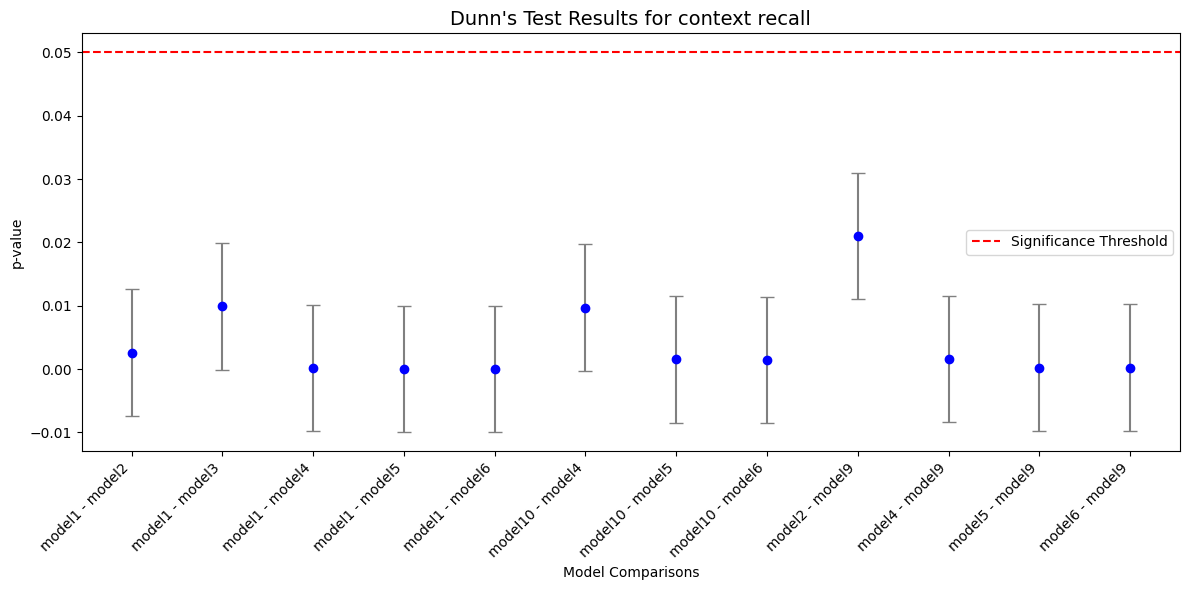

In [61]:
# Perform Dunn's test
dunn_results = posthoc_dunn(
    test_results, val_col="context_recall", group_col="model", p_adjust="bonferroni"
)

# Extract significant comparisons
significant_pairs2 = [
    (row, col, p_value)
    for row, series in dunn_results.iterrows()
    for col, p_value in series.items()
    if row < col and p_value < 0.05
]

# Prepare visualization data
x_labels = []
x_values = []
y_errors = []

for i, (model1, model2, p_value) in enumerate(significant_pairs2):
    x_labels.append(f"{model1} - {model2}")
    x_values.append(p_value) 
    y_errors.append(0.01)  # Placeholder error bars

# Plot the results
plt.figure(figsize=(12, 6))
plt.errorbar(x_labels, x_values, yerr=y_errors, fmt='o', color='blue', ecolor='gray', capsize=5)
plt.axhline(0.05, color='red', linestyle='--', label="Significance Threshold")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model Comparisons")
plt.ylabel("p-value")
plt.title(f"Dunn's Test Results for context recall", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

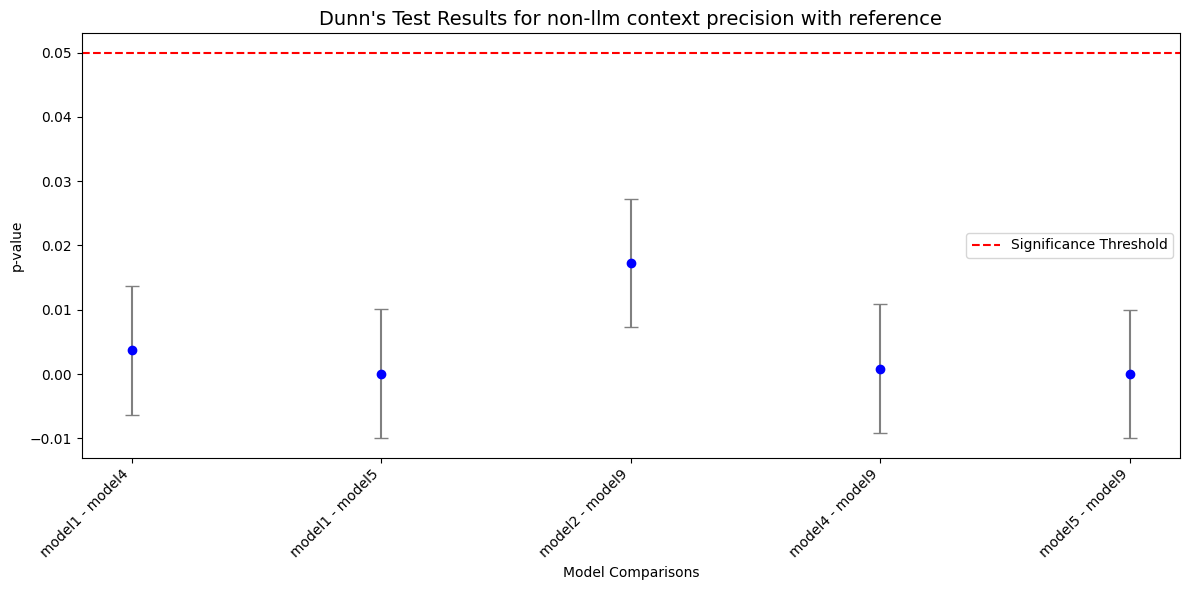

In [63]:
# Perform Dunn's test
dunn_results = posthoc_dunn(
    test_results, val_col="non_llm_context_precision_with_reference", group_col="model", p_adjust="bonferroni"
)

# Extract significant comparisons
significant_pairs3 = [
    (row, col, p_value)
    for row, series in dunn_results.iterrows()
    for col, p_value in series.items()
    if row < col and p_value < 0.05
]

# Prepare visualization data
x_labels = []
x_values = []
y_errors = []

for i, (model1, model2, p_value) in enumerate(significant_pairs3):
    x_labels.append(f"{model1} - {model2}")
    x_values.append(p_value) 
    y_errors.append(0.01)  # Placeholder error bars

# Plot the results
plt.figure(figsize=(12, 6))
plt.errorbar(x_labels, x_values, yerr=y_errors, fmt='o', color='blue', ecolor='gray', capsize=5)
plt.axhline(0.05, color='red', linestyle='--', label="Significance Threshold")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model Comparisons")
plt.ylabel("p-value")
plt.title(f"Dunn's Test Results for non-llm context precision with reference", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

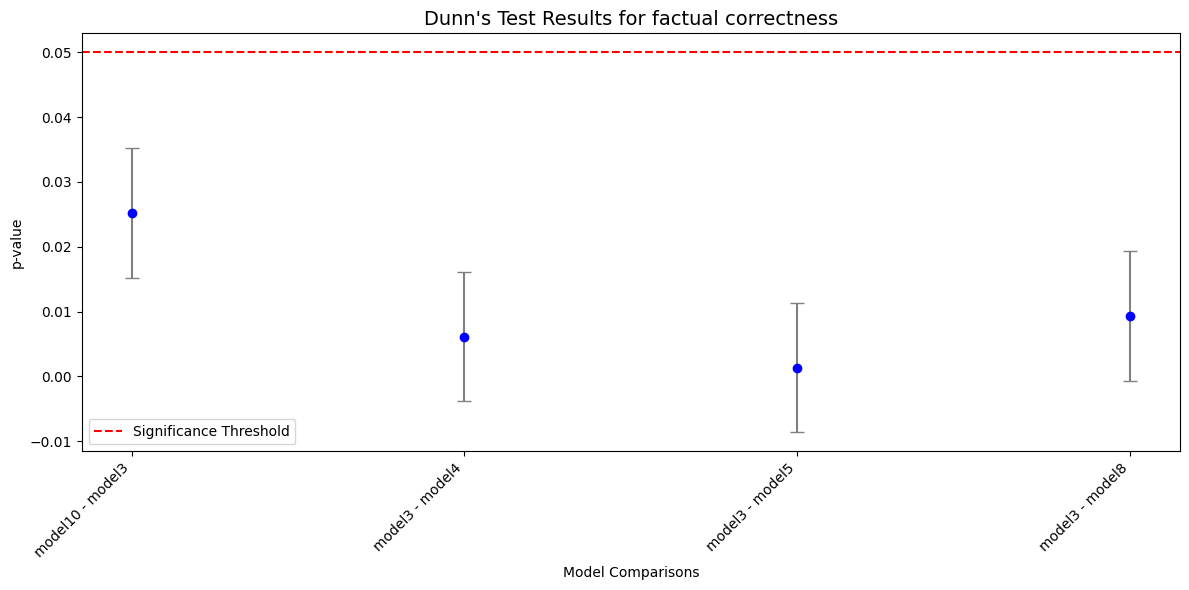

In [64]:
# Perform Dunn's test
dunn_results = posthoc_dunn(
    test_results, val_col="factual_correctness", group_col="model", p_adjust="bonferroni"
)

# Extract significant comparisons
significant_pairs4 = [
    (row, col, p_value)
    for row, series in dunn_results.iterrows()
    for col, p_value in series.items()
    if row < col and p_value < 0.05
]

# Prepare visualization data
x_labels = []
x_values = []
y_errors = []

for i, (model1, model2, p_value) in enumerate(significant_pairs4):
    x_labels.append(f"{model1} - {model2}")
    x_values.append(p_value) 
    y_errors.append(0.01)  # Placeholder error bars

# Plot the results
plt.figure(figsize=(12, 6))
plt.errorbar(x_labels, x_values, yerr=y_errors, fmt='o', color='blue', ecolor='gray', capsize=5)
plt.axhline(0.05, color='red', linestyle='--', label="Significance Threshold")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model Comparisons")
plt.ylabel("p-value")
plt.title(f"Dunn's Test Results for factual correctness", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

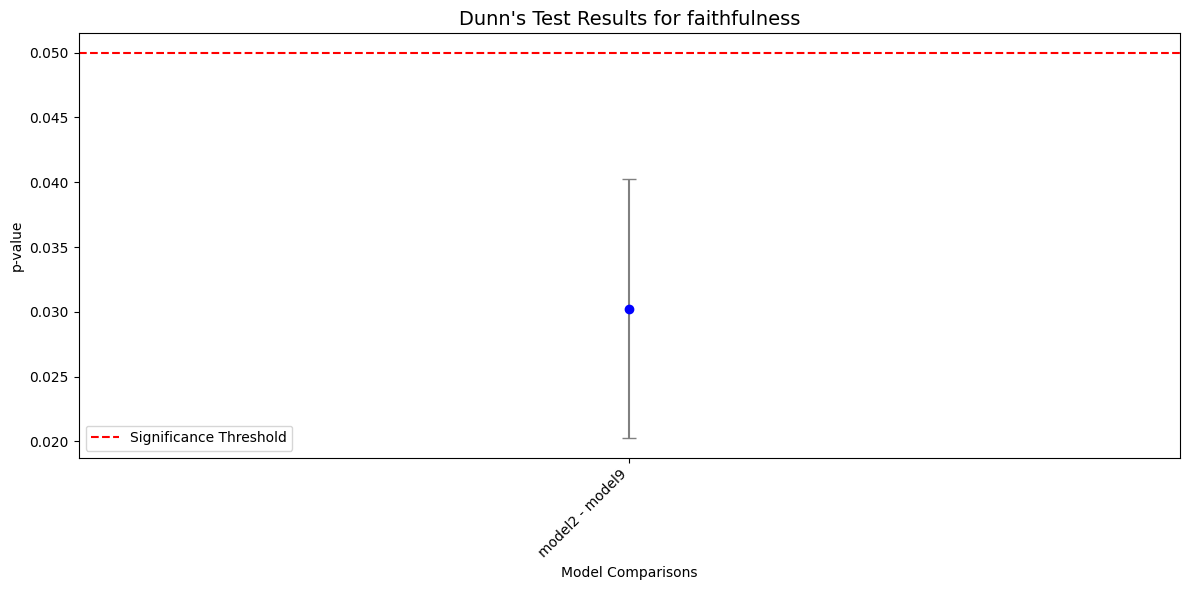

In [65]:
# Perform Dunn's test
dunn_results = posthoc_dunn(
    test_results, val_col="faithfulness", group_col="model", p_adjust="bonferroni"
)

# Extract significant comparisons
significant_pairs5 = [
    (row, col, p_value)
    for row, series in dunn_results.iterrows()
    for col, p_value in series.items()
    if row < col and p_value < 0.05
]

# Prepare visualization data
x_labels = []
x_values = []
y_errors = []

for i, (model1, model2, p_value) in enumerate(significant_pairs5):
    x_labels.append(f"{model1} - {model2}")
    x_values.append(p_value) 
    y_errors.append(0.01)  # Placeholder error bars

# Plot the results
plt.figure(figsize=(12, 6))
plt.errorbar(x_labels, x_values, yerr=y_errors, fmt='o', color='blue', ecolor='gray', capsize=5)
plt.axhline(0.05, color='red', linestyle='--', label="Significance Threshold")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model Comparisons")
plt.ylabel("p-value")
plt.title(f"Dunn's Test Results for faithfulness", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

### One-sided Wilcoxon signed-rank test to find the statistically higher performance

Semantic similarity

In [86]:
# Filter data for Wilcoxon signed-rank test
metric_data = test_results[["model", "semantic_similarity"]].dropna()

# Prepare pairwise comparisons for one-sided Wilcoxon tests
pairwise_results = []

for model1, model2 in itertools.combinations(test_results["model"].unique(), 2):
    data1 = metric_data.loc[metric_data["model"] == model1, "semantic_similarity"].values
    data2 = metric_data.loc[metric_data["model"] == model2, "semantic_similarity"].values
    
    # Ensure paired comparison by matching lengths
    min_len = min(len(data1), len(data2))
    data1, data2 = data1[:min_len], data2[:min_len]
    
    # Perform one-sided Wilcoxon test 
    stat, p_value = wilcoxon(data1, data2, alternative='greater')
    pairwise_results.append((model1, model2, stat, p_value))

# Filter significant results
significant_results = [(m1, m2, stat, p) for m1, m2, stat, p in pairwise_results if p < 0.05]

# Display significant one-sided Wilcoxon test results
significant_results

[('model1', 'model2', np.float64(5634.0), np.float64(0.004064317332497023)),
 ('model1', 'model3', np.float64(6004.0), np.float64(0.00012217473374889266)),
 ('model2', 'model3', np.float64(5451.0), np.float64(0.012685797521323839)),
 ('model4', 'model6', np.float64(5141.0), np.float64(0.043818217927143785)),
 ('model5', 'model6', np.float64(5894.0), np.float64(0.0003151024691899483)),
 ('model8', 'model9', np.float64(5262.0), np.float64(0.03505180877640167))]

In [108]:
mean_metric = (
    test_results.groupby("model")["semantic_similarity"].mean().sort_values(ascending=False)
)

mean_metric

model
model5     0.916234
model8     0.915434
model10    0.914678
model7     0.913121
model9     0.911773
model1     0.909902
model4     0.909051
model6     0.892931
model2     0.879584
model3     0.859914
Name: semantic_similarity, dtype: float64

Context Recall

In [87]:
# Filter data for Wilcoxon signed-rank test
metric_data = test_results[["model", "context_recall"]].dropna()

# Prepare pairwise comparisons for one-sided Wilcoxon tests
pairwise_results = []

for model1, model2 in itertools.combinations(test_results["model"].unique(), 2):
    data1 = metric_data.loc[metric_data["model"] == model1, "context_recall"].values
    data2 = metric_data.loc[metric_data["model"] == model2, "context_recall"].values
    
    # Ensure paired comparison by matching lengths
    min_len = min(len(data1), len(data2))
    data1, data2 = data1[:min_len], data2[:min_len]
    
    # Perform one-sided Wilcoxon test
    stat, p_value = wilcoxon(data1, data2, alternative='greater')
    pairwise_results.append((model1, model2, stat, p_value))

# Filter significant results
significant_results = [(m1, m2, stat, p) for m1, m2, stat, p in pairwise_results if p < 0.05]

# Display significant one-sided Wilcoxon test results
significant_results

[('model2', 'model9', np.float64(1379.0), np.float64(8.031532218703223e-05)),
 ('model2', 'model10', np.float64(1573.5), np.float64(0.0012578837217696094)),
 ('model3', 'model9', np.float64(2026.5), np.float64(0.0015005547719268383)),
 ('model3', 'model10', np.float64(1612.0), np.float64(0.007266249362895184)),
 ('model4', 'model7', np.float64(853.0), np.float64(0.017854361172045845)),
 ('model4', 'model8', np.float64(949.5), np.float64(0.0012221862045703725)),
 ('model4', 'model9', np.float64(1543.0), np.float64(1.4582411605549248e-06)),
 ('model4', 'model10', np.float64(1557.5), np.float64(1.9587775424516407e-05)),
 ('model5', 'model7', np.float64(985.0), np.float64(0.033439577058110306)),
 ('model5', 'model8', np.float64(1065.0), np.float64(0.0008730962086149795)),
 ('model5', 'model9', np.float64(1856.5), np.float64(1.0990608620677132e-07)),
 ('model5', 'model10', np.float64(1725.0), np.float64(1.826896340590955e-06)),
 ('model6', 'model7', np.float64(805.5), np.float64(0.012070271

In [107]:
mean_metric = (
    test_results.groupby("model")["context_recall"].mean().sort_values(ascending=False)
)

mean_metric

model
model5     0.720328
model6     0.719131
model4     0.704207
model2     0.654657
model3     0.644987
model7     0.620020
model8     0.587775
model10    0.509331
model9     0.480560
model1     0.442131
Name: context_recall, dtype: float64

Non-LLM Context Precision With Reference

In [88]:
# Filter data for Wilcoxon signed-rank test
metric_data = test_results[["model", "non_llm_context_precision_with_reference"]].dropna()

# Prepare pairwise comparisons for one-sided Wilcoxon tests
pairwise_results = []

for model1, model2 in itertools.combinations(test_results["model"].unique(), 2):
    data1 = metric_data.loc[metric_data["model"] == model1, "non_llm_context_precision_with_reference"].values
    data2 = metric_data.loc[metric_data["model"] == model2, "non_llm_context_precision_with_reference"].values
    
    # Ensure paired comparison by matching lengths
    min_len = min(len(data1), len(data2))
    data1, data2 = data1[:min_len], data2[:min_len]
    
    # Perform one-sided Wilcoxon test
    stat, p_value = wilcoxon(data1, data2, alternative='greater')
    pairwise_results.append((model1, model2, stat, p_value))

# Filter significant results
significant_results = [(m1, m2, stat, p) for m1, m2, stat, p in pairwise_results if p < 0.05]

# Display significant one-sided Wilcoxon test results
significant_results

[('model2', 'model6', np.float64(1109.5), np.float64(0.044922240715768176)),
 ('model2', 'model7', np.float64(1098.5), np.float64(0.029712338101966728)),
 ('model2', 'model9', np.float64(1555.5), np.float64(2.35442996990893e-05)),
 ('model2', 'model10', np.float64(727.5), np.float64(0.04134892703607713)),
 ('model3', 'model9', np.float64(1152.0), np.float64(0.0001979017974203331)),
 ('model4', 'model6', np.float64(1057.0), np.float64(0.0012431141494248191)),
 ('model4', 'model7', np.float64(974.5), np.float64(0.0005609700997414417)),
 ('model4', 'model8', np.float64(806.0), np.float64(0.012577294259179788)),
 ('model4', 'model9', np.float64(1370.0), np.float64(2.8845700550771348e-08)),
 ('model4', 'model10', np.float64(779.5), np.float64(0.0015217266223373736)),
 ('model5', 'model6', np.float64(1492.0), np.float64(1.058273735968015e-05)),
 ('model5', 'model7', np.float64(1115.0), np.float64(1.0585172541568216e-05)),
 ('model5', 'model8', np.float64(1148.5), np.float64(0.000229340042049

In [109]:
mean_metric = (
    test_results.groupby("model")["non_llm_context_precision_with_reference"].mean().sort_values(ascending=False)
)

mean_metric

model
model5     0.407411
model4     0.360941
model2     0.315240
model3     0.295945
model8     0.287910
model6     0.269701
model10    0.269424
model7     0.251301
model1     0.171071
model9     0.159094
Name: non_llm_context_precision_with_reference, dtype: float64

Factual Correctness

In [89]:
# Filter data for Wilcoxon signed-rank test
metric_data = test_results[["model", "factual_correctness"]].dropna()

# Prepare pairwise comparisons for one-sided Wilcoxon tests
pairwise_results = []

for model1, model2 in itertools.combinations(test_results["model"].unique(), 2):
    data1 = metric_data.loc[metric_data["model"] == model1, "factual_correctness"].values
    data2 = metric_data.loc[metric_data["model"] == model2, "factual_correctness"].values
    
    # Ensure paired comparison by matching lengths
    min_len = min(len(data1), len(data2))
    data1, data2 = data1[:min_len], data2[:min_len]
    
    # Perform one-sided Wilcoxon test
    stat, p_value = wilcoxon(data1, data2, alternative='greater')
    pairwise_results.append((model1, model2, stat, p_value))

# Filter significant results
significant_results = [(m1, m2, stat, p) for m1, m2, stat, p in pairwise_results if p < 0.05]

# Display significant one-sided Wilcoxon test results
significant_results

[('model1', 'model3', np.float64(3538.0), np.float64(0.021837610355166397)),
 ('model2', 'model3', np.float64(3287.5), np.float64(0.004372986817269924)),
 ('model4', 'model9', np.float64(4578.5), np.float64(0.017298055784462016)),
 ('model5', 'model9', np.float64(4625.5), np.float64(0.0045649362750498825)),
 ('model7', 'model9', np.float64(3478.0), np.float64(0.03357443796254792)),
 ('model8', 'model9', np.float64(3939.0), np.float64(0.001132958475516845))]

In [110]:
mean_metric = (
    test_results.groupby("model")["factual_correctness"].mean().sort_values(ascending=False)
)

mean_metric

model
model5     0.352803
model4     0.339621
model8     0.333008
model10    0.324586
model7     0.310150
model6     0.307121
model2     0.305748
model1     0.276288
model9     0.260376
model3     0.223864
Name: factual_correctness, dtype: float64

Faithfulness

In [90]:
# Filter data for Wilcoxon signed-rank test
metric_data = test_results[["model", "faithfulness"]].dropna()

# Prepare pairwise comparisons for one-sided Wilcoxon tests
pairwise_results = []

for model1, model2 in itertools.combinations(test_results["model"].unique(), 2):
    data1 = metric_data.loc[metric_data["model"] == model1, "faithfulness"].values
    data2 = metric_data.loc[metric_data["model"] == model2, "faithfulness"].values
    
    # Ensure paired comparison by matching lengths
    min_len = min(len(data1), len(data2))
    data1, data2 = data1[:min_len], data2[:min_len]
    
    # Perform one-sided Wilcoxon test
    stat, p_value = wilcoxon(data1, data2, alternative='greater')
    pairwise_results.append((model1, model2, stat, p_value))

# Filter significant results
significant_results = [(m1, m2, stat, p) for m1, m2, stat, p in pairwise_results if p < 0.05]

# Display significant one-sided Wilcoxon test results
significant_results

[('model1', 'model9', np.float64(2855.0), np.float64(0.027061005585730696)),
 ('model2', 'model3', np.float64(3810.0), np.float64(0.030357742635432988)),
 ('model2', 'model8', np.float64(3940.5), np.float64(0.030405086015895796)),
 ('model2', 'model9', np.float64(4429.5), np.float64(0.0005622468164391868)),
 ('model2', 'model10', np.float64(4307.0), np.float64(0.009977143684566906)),
 ('model4', 'model8', np.float64(3743.5), np.float64(0.01965955661397235)),
 ('model4', 'model9', np.float64(4316.0), np.float64(3.356418806187348e-05)),
 ('model4', 'model10', np.float64(4182.0), np.float64(0.005272203863778162)),
 ('model5', 'model8', np.float64(3484.5), np.float64(0.003983779073584452)),
 ('model5', 'model9', np.float64(4103.0), np.float64(8.056176098404516e-05)),
 ('model5', 'model10', np.float64(3829.0), np.float64(0.0008695630181461263)),
 ('model6', 'model8', np.float64(3810.5), np.float64(0.019339142060981585)),
 ('model6', 'model9', np.float64(4416.5), np.float64(0.001267795707525

In [111]:
mean_metric = (
    test_results.groupby("model")["faithfulness"].mean().sort_values(ascending=False)
)

mean_metric

model
model2     0.531785
model5     0.521020
model6     0.518622
model4     0.507125
model7     0.479533
model3     0.450397
model8     0.429871
model1     0.425569
model10    0.406071
model9     0.372242
Name: faithfulness, dtype: float64